# Julia, What?

- Oliver Will
- 2021-02-18
- v2

I always check if the namespace is empty.

In [1]:
# Do not run for the presentation
# varinfo()

| name | size | summary |
|:---- | ----:|:------- |
| Base |      | Module  |
| Core |      | Module  |
| Main |      | Module  |


## Three programming concepts
1. Variable assignment


In [2]:
# Example of variable assignment
x = 2

# At first I didn't realize Julia has println
print(string(x)*'\n')

# Julia can handle multiple assignment as well
x = "Hello world"
# println(x)
# Julia creates a variable called ans that outputs at the end of a execution block

2


"Hello world"

2. Functions

In [5]:
# Example of function assignment
function f(x, y)
    x+y
end
println(f(2, 3))
varinfo()

5


| name |     size | summary   |
|:---- | --------:|:--------- |
| Base |          | Module    |
| Core |          | Module    |
| Main |          | Module    |
| f    |  0 bytes | typeof(f) |
| x    | 19 bytes | String    |


There's no easy way to remove variables and functions from the namespace. However, R populates working directories with a .RData file. This file keeps a history of the current variables, functions, etc. It feels like most of the R bugs over my working history were due to do too many objects being around. Whenever I open R, I delete all the objects that are there. Julia doesn't keep a history like this and resets everything each time you start. 

3. Adding a package

Note: Julia has two keywords for adding packages, import and use. They add the packages in slightly different ways. Import allows modifications to packages and use doesn't. As a novice user, use is probably the better function to use.

In [4]:
# Not run. Too slow
import Pkg
Pkg.add("Distributions")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("GLM")
using DataFrames

   Updating registry at `C:\Users\willo\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\willo\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\willo\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\willo\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\willo\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\willo\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\willo\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\willo\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\willo\.julia\environments\v1.5\Manifest.toml`



# Simulate a dataset

It's easy to get into Markdown in Jupyter and it can handle $LaTex$.

We create our first data set with 100 points. 

Simulate a regression of the form \begin{equation}y=\beta_0+\beta_1 x+\epsilon\end{equation}

where $\epsilon \sim \text{Normal}(0, \sigma=4)$.

Make it easy and let $\beta_0 = 5$ and $\beta_1 = 2$.

$x$ will be simulated from a $\text{Normal}(\mu = 0, \sigma = 4)$ and $\epsilon \sim \text{Normal}(\mu = 0, \sigma = 4)$.

In [6]:
using Random, Distributions
Random.seed!(4)
den = Normal(0, 4)
x = rand(den, 100)

# Does den need to be assigned?
x = rand(Normal(0, 4) ,100)
println(x[1:10])

[-7.644853083800139, -0.4003392155208435, -1.5154871950710738, 8.150399273772765, -5.523464111790017, -3.34380980685789, -0.6412092197047692, -1.5822215622301083, -0.9799396313601807, 2.785023717858505]


In [7]:
# Add the response variable 
y = 5 .+2*x+rand(den, 100)
println(y[1:10])

[-19.093772050211747, 6.218541844257578, 4.099552408406434, 22.425533781827856, -7.382094735182875, 9.532128154881445, 4.308452068328007, -1.6925800064909837, 14.376221043250556, 7.073561051686646]


In [12]:
# Make a dataframe
df = DataFrame(x=x, y=y)
println(df[1:10,1:2])

# Reference by 
println(df[1:10, [:x, :y]])

10×2 DataFrame
 Row │ x          y         
     │ Float64    Float64   
─────┼──────────────────────
   1 │ -7.64485   -19.0938
   2 │ -0.400339    6.21854
   3 │ -1.51549     4.09955
   4 │  8.1504     22.4255
   5 │ -5.52346    -7.38209
   6 │ -3.34381     9.53213
   7 │ -0.641209    4.30845
   8 │ -1.58222    -1.69258
   9 │ -0.97994    14.3762
  10 │  2.78502     7.07356
10×2 DataFrame
 Row │ x          y         
     │ Float64    Float64   
─────┼──────────────────────
   1 │ -7.64485   -19.0938
   2 │ -0.400339    6.21854
   3 │ -1.51549     4.09955
   4 │  8.1504     22.4255
   5 │ -5.52346    -7.38209
   6 │ -3.34381     9.53213
   7 │ -0.641209    4.30845
   8 │ -1.58222    -1.69258
   9 │ -0.97994    14.3762
  10 │  2.78502     7.07356


## Plot the data

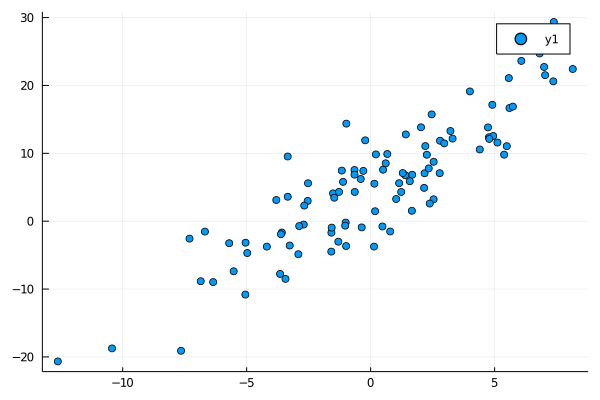

In [13]:
using Plots
plot(df[!, :x], df[!, :y], seriestype = :scatter)

The exclamation point ! is for indexing data frames. ! gives you indexing by reference. : operator will copy it over. 

Note: Julia has a === asking if the two objects are the same. 

No extra plotting universe, but this is cool.

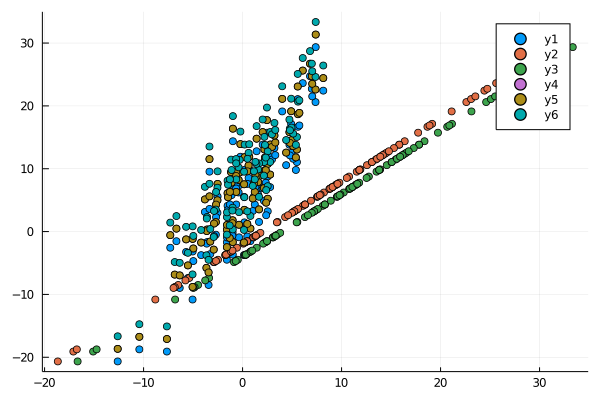

In [14]:
y = d[:, :y].+2
plot!(d[!, :x], y, seriestype = :scatter)
y = y.+2
plot!(d[!, :x], y, seriestype = :scatter)

# Linear Regression
We'll fit a linear regression with OLS.

In [15]:
using GLM
fm = lm(@formula(y ~ x), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

y ~ 1 + x

Coefficients:
───────────────────────────────────────────────────────────────────────
               Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  4.98311    0.443602  11.23    <1e-18    4.10279    5.86342
x            2.04832    0.109452  18.71    <1e-33    1.83112    2.26553
───────────────────────────────────────────────────────────────────────

# Plot the line 
Through the scatter plot.

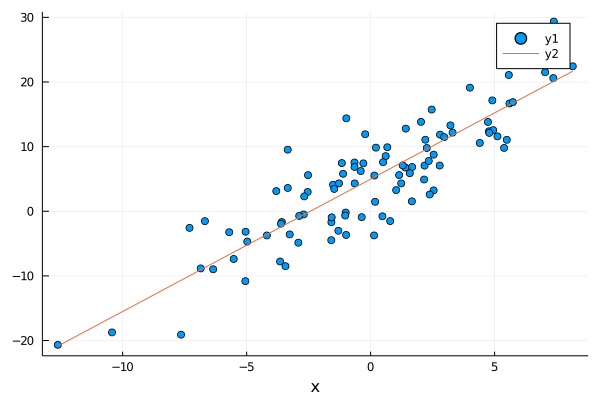

In [20]:
b0 = GLM.coef(fm)[1]
b1 = GLM.coef(fm)[2]
y_hat = b0.+b1*d[:, :x]
plot(df[!, :x], df[!, :y], seriestype = :scatter)
plot!(df[!, :x], y_hat, xlabel="x")

# Regression exploration

We want to explore the regression line. 
- Means are on the regression line
- The slope is $r \times \sigma_y/\sigma_x$
- Solve for intercept

In [2]:
# Summary statistics 
m_x = mean(df[!,:x])
m_y = mean(df[!,:y])
println("Are the means on the line?")
println(m_y == b0+b1*m_x)

LoadError: UndefVarError: df not defined

In [ ]:
println(m_y) 
println(b0+b1*m_x)


In [ ]:
println("\nIs the formula for the slope correct?")
println(b1)
println(cor(d[!, :x], d[!, :y])*std(d[!, :y])/std(d[!, :x]))
println("\nWhat about the intercept?")
println(b0)
println(m_y-b1*m_x)

None of the values are equal!

### Why did R give us equal values and Python and Julia did not?
I don't know how R is handling it's precision. I assume that Python is handling OLS in the same manner as Julia. 

The percision is off because Julia actually provided it's method for soliving OLS. I wrote the data in the slides so it would look like a matrix. There's a matrix form for linear regression, namely we want to find $\beta$ that minimize 
\begin{equation} (\mathbf{Y}-\mathbf{X\beta})^T(\mathbf{Y}-\mathbf{X\beta}) \end{equation}

which is called the inner product. For one predictor and three data points, the vectors and matrix are

$\mathbf{Y} = \left(\begin{array}{c}y_1 \\ y_2 \\ y_3\end{array}\right)$, $\mathbf{\beta} = \left(\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right)$, and $\mathbf{X} =\left(\begin{array}{cc} 1 & x_{11} \\ 1 & x_{21} \\ 1 & x_{31} \end{array} \right)$. 

The inner product is $\left(y_1-\beta_0-x_{11}\beta_1 \right)^2+\left(y_2-\beta_0-x_{21}\beta_1\right)^2+\left(y_3-\beta_0-x_{31}\beta_1\right)^2$ which is a function from $\mathbf{\beta} \rightarrow\mathbb{R}$. Hence, we take the derivate, set it to 0, and solve to find the $\mathbf{\beta}$ that minimize the inner product. For our example,

\begin{align} \frac{d}{d\beta} (\mathbf{Y}-\mathbf{X\beta})^T(\mathbf{Y}-\mathbf{X\beta})  & =  \left[\begin{array}{c} \frac{\partial}{\partial \beta_0}(\mathbf{Y}-\mathbf{X\beta})^T(\mathbf{Y}-\mathbf{X\beta}) \\
\frac{\partial}{\partial \beta_0}(\mathbf{Y}-\mathbf{X\beta})^T(\mathbf{Y}-\mathbf{X\beta})\end{array} \right] \\ 
& = \left[\begin{array}{c}2[\left(y_1-\beta_0-x_{11}\beta_1 \right)+2\left(y_2-\beta_0-x_{21}\beta_1 \right)+2\left(y_3-\beta_0-x_{31}\beta_1 \right) \\ 
2[\left(y_1-\beta_0-x_{11}\beta_1 \right)x_{11}+2\left(y_2-\beta_0-x_{21}\beta_1 \right)x_{21}+2\left(y_3-\beta_0-x_{31}\beta_1 \right)x_{31}
\end{array}\right] \\ 
& = 2\left[\begin{array}{ccc}1 & 1 & 1 \\ x_{11} & x_{21} & x_{31} \end{array}\right]\left[\begin{array}{c} y_1-\beta_0-x_{11}\beta_1 \\
y_2-\beta_0-x_{21}\beta_1 \\
y_3-\beta_0-x_{31}\beta_1 \end{array}\right] \\
& = 2\mathbf{X}^T\left(\mathbf{Y}-\mathbf{X\beta}\right)
\end{align}

Somewhere there's matrix chain rule from calculus that will give you the derivative. You can set that equal to 0 and get $\mathbf{\beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{Y}$. 

Which really doesn't explain why $b_1 = r\frac{\textrm{SD}_y}{\textrm{SD}_x}$.

Based on Julia's hint, it uses Cholesky decomposition to find $\textbf{X}^T\textbf{X}$, which is an iterative method and why there are slight numerical differences. 


# Check the model assumptions
1. Linear and additive
2. Errors are independent
3. Errors are normal
4. Errors are equal variance

At this point, I don't know enough about Julia to work this out.

# Final question: Did the 3 programming languages produce simulate data from the same distribution?

I find the scatter plots weird. Are these really the same distributions?

In [31]:
Pkg.add("CSV")
using CSV

df_R = CSV.read("r_simulation.csv", DataFrame)
CSV.write("julia_simulation.csv", df)

  Resolving package versions...
No Changes to `C:\Users\willo\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\willo\.julia\environments\v1.5\Manifest.toml`


"julia_simulation.csv"

In [20]:
pwd()

"C:\\Users\\willo\\Documents\\Personal\\DataPhilly Workshop 202102"